In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from serial import Serial

# Math Thoughts
Fs is 3000Hz
Sampling limit is 1500Hz
FFT size is 1024
Bin width is 1.36Hz


<IPython.core.display.Javascript object>


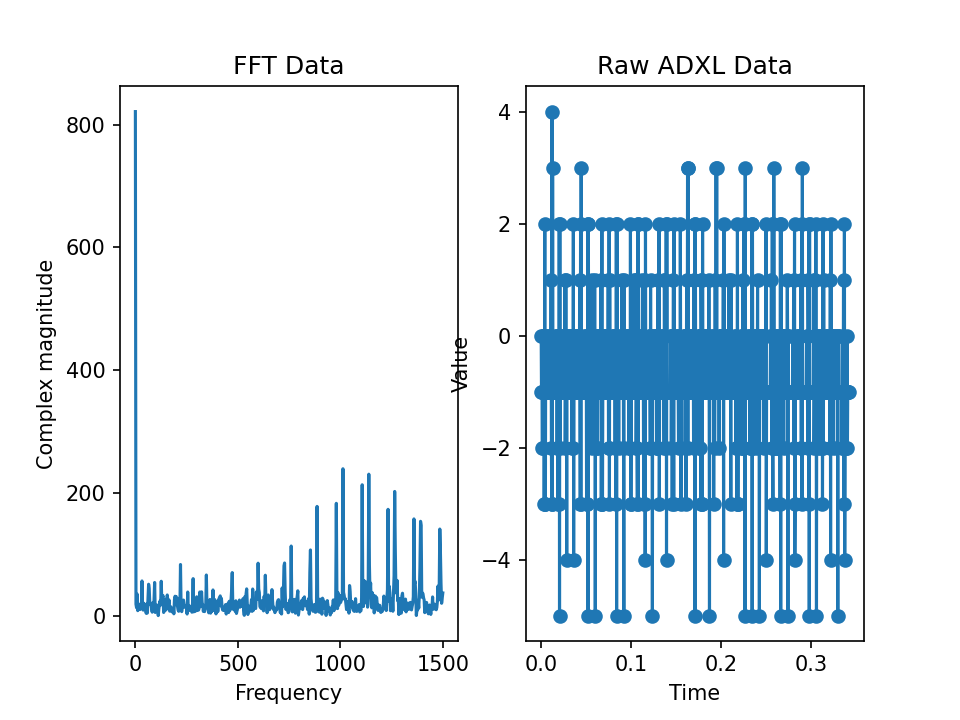

Total point count: 1024
Peak frequency: 0.0


In [106]:
%matplotlib notebook

raw_data_1 = None
raw_data_2 = None
send_command = "d"
with Serial(port="COM3",baudrate=115200) as ser:
    ser.reset_input_buffer()
    ser.reset_output_buffer()
    ser.write(send_command.encode('ascii'))
    ser.flush()
    raw_data_1 = ser.readline()
    raw_data_2 = ser.readline()
    
    
data_adxl = np.array([int(number) for number in raw_data_1.strip().split()])
data_fft = np.array([float(number) for number in raw_data_2.strip().split()])
time = np.linspace(0, data_adxl.shape[0] / 3000, data_adxl.shape[0])
frequency = np.linspace(0, 1500, data_fft.shape[0])
fig, axs = plt.subplots(1,2)
axs[0].set_title("FFT Data")
axs[0].set_xlabel("Frequency")
axs[0].set_ylabel("Complex magnitude")
axs[0].plot(frequency, data_fft)

axs[1].set_title("Raw ADXL Data")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Value")
axs[1].plot(time, data_adxl, marker='o')
print(f"Total point count: {data_adxl.shape[0]}")
print(f"Peak frequency: {frequency[data_fft.argmax()]}")